# Imports

In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# make sure you've downloaded the stop words
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akams\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akams\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akams\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
df = pd.read_csv('deep_clean_data.csv', index_col = 0)
df

,Ingredients,Cuisine
0,chicken thighs drumsticks sea salt flakes soft...,1
1,chicken beef short ribs ribs separated piece b...,1
2,unsalted butter softened golden caster sugar e...,1
3,whole chicken jointed bonein chicken pieces us...,1
4,macaroni whole milk bay leaves butter plain fl...,1
...,...,...
895,urid dal black vegetable oil freshly grated gi...,20
896,strong white flour salt sachet fastaction drie...,20
897,chopped rhubarb light soft brown sugar vanilla...,20
898,flour selfraising flour red chilli powder gara...,20


In [69]:
cuisines_dict_map

{1: 'American',
 2: 'British',
 3: 'Caribbean',
 4: 'Chinese',
 5: 'Fench',
 6: 'Greek',
 7: 'Indian',
 8: 'Italian',
 9: 'Japanese',
 10: 'Mediterranean',
 11: 'Mexican',
 12: 'Moroccan',
 13: 'Spanish',
 14: 'Thai',
 15: 'Turkish',
 16: 'Vietnamese',
 17: 'Irish',
 18: 'Nordic',
 19: 'North_African',
 20: 'Pakistani'}

In [79]:
import pickle

cuisines_dict_map = {1: 'American', 2: 'British', 3: 'Caribbean', 4: 'Chinese', 5: 'Fench', 6: 'Greek', 7: 'Indian', 8: 'Italian', 9: 'Japanese', 10: 'Mediterranean', 11: 'Mexican', 12: 'Moroccan', 13: 'Spanish', 14: 'Thai', 15: 'Turkish', 16: 'Vietnamese', 17: 'Irish', 18: 'Nordic', 19: 'North_African', 20: 'Pakistani'}
cuisines_lst_map = ['American', 'British', 'Caribbean', 'Chinese', 'Fench', 'Greek', 'Indian', 'Italian', 'Japanese', 'Mediterranean', 'Mexican', 'Moroccan', 'Spanish', 'Thai', 'Turkish', 'Vietnamese', 'Irish', 'Nordic', 'North_African', 'Pakistani']

pickle.dump(cuisines_dict_map, open( "cuisines_dict_map.pickle", "wb" ) )
pickle.dump(cuisines_lst_map, open( "cuisines_lst_map.pickle", "wb" ) )

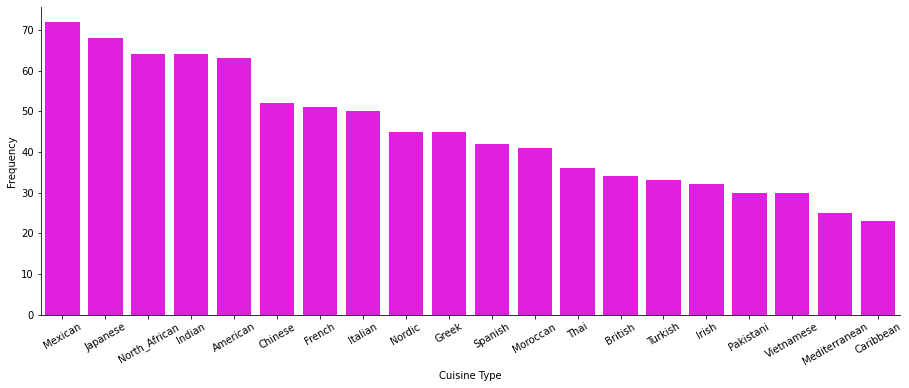

In [75]:
sns_lst_map = ['Mexican', 'Japanese', 'North_African', 'Indian', 'American', 'Chinese', 'French', 'Italian', 'Nordic', 'Greek', 'Spanish',
               'Moroccan', 'Thai', 'British', 'Turkish', 'Irish', 'Pakistani', 'Vietnamese', 'Mediterranean', 'Caribbean']
cuisines_plt = sns.factorplot("Cuisine", data=df, aspect=2.5, kind= "count", color="magenta", order = df['Cuisine'].value_counts().index)
cuisines_plt.set_xticklabels(sns_lst_map, rotation=30)
cuisines_plt.set_ylabels('Frequency')
cuisines_plt.set_xlabels('Cuisine Type')

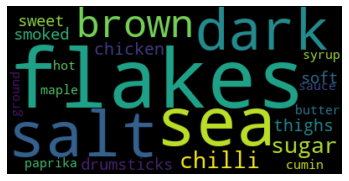

In [10]:
# look at first ingredient wordcloud
text = df.Ingredients[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

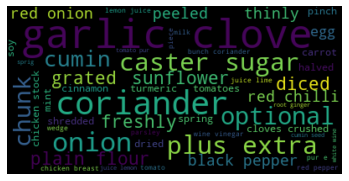

In [9]:
test = [x for x in df['Ingredients']]
test = ' '.join(test)
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords = more_words, max_words = 50).generate(test)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
df['Cuisine'].value_counts()

11    72
9     68
19    64
7     64
1     63
4     52
5     51
8     50
18    45
6     45
13    42
12    41
14    36
2     34
15    33
17    32
20    30
16    30
10    25
3     23
Name: Cuisine, dtype: int64

In [10]:
# subset dataframe per cuisine
american = df[df['Cuisine'] == 1]
british = df[df['Cuisine'] == 2]
caribbean = df[df['Cuisine'] == 3]
chinese = df[df['Cuisine'] == 4]
french = df[df['Cuisine'] == 5]
greek = df[df['Cuisine'] == 6]
indian = df[df['Cuisine'] == 7]
italian = df[df['Cuisine'] == 8]
japanese = df[df['Cuisine'] == 9]
mediterranean = df[df['Cuisine'] == 10]
mexican = df[df['Cuisine'] == 11]
morocca = df[df['Cuisine'] == 12]
spanish = df[df['Cuisine'] == 13]
thai = df[df['Cuisine'] == 14]
turkish = df[df['Cuisine'] == 15]
vietnamese = df[df['Cuisine'] == 16]
irish = df[df['Cuisine'] == 17]
nordic = df[df['Cuisine'] == 18]
north_african = df[df['Cuisine'] == 19]
pakistani = df[df['Cuisine'] == 20]

# join all recipes for each cuisine for wordclouds
amer = ' '.join(recipe for recipe in american['Ingredients'])
brit = ' '.join(recipe for recipe in british['Ingredients'])
cari = ' '.join(recipe for recipe in caribbean['Ingredients'])             
chin = ' '.join(recipe for recipe in chinese['Ingredients'])
fren = ' '.join(recipe for recipe in french['Ingredients'])                               
gree = ' '.join(recipe for recipe in greek['Ingredients'])
indi = ' '.join(recipe for recipe in indian['Ingredients'])             
ital = ' '.join(recipe for recipe in italian['Ingredients'])             
japa = ' '.join(recipe for recipe in japanese['Ingredients'])             
medi = ' '.join(recipe for recipe in mediterranean['Ingredients'])               
mexi = ' '.join(recipe for recipe in mexican['Ingredients'])
moro = ' '.join(recipe for recipe in morocca['Ingredients'])
span = ' '.join(recipe for recipe in spanish['Ingredients'])
thai = ' '.join(recipe for recipe in thai['Ingredients'])
turk = ' '.join(recipe for recipe in turkish['Ingredients'])
viet = ' '.join(recipe for recipe in vietnamese['Ingredients'])
iris = ' '.join(recipe for recipe in irish['Ingredients'])
nord = ' '.join(recipe for recipe in nordic['Ingredients'])
nafr = ' '.join(recipe for recipe in north_african['Ingredients'])
paki = ' '.join(recipe for recipe in pakistani['Ingredients'])

In [14]:
more_words = ['chopped', 'sliced', 'sauce', 'finely', 'roughly', 'leave', 'serve', 'cut', 'olive', 'oil', 'leaves', 'salt',
           'butter', 'pack', 'vegetable', 'onions', 'handful', 'cooked', 'ground', 'fresh', 'freerange']
def wordcloud(cuisine, cuisine_type):
    wordcloud = WordCloud(max_words = 50, stopwords = more_words, background_color = 'white').generate(cuisine)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{cuisine_type}')
    plt.axis("off")
    return plt.show()

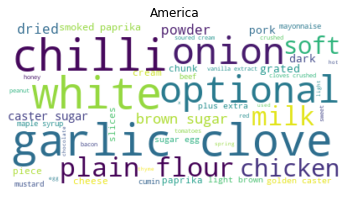

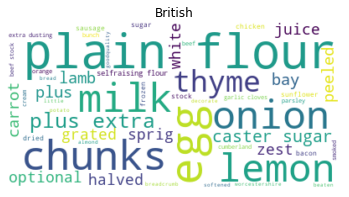

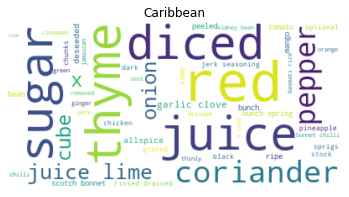

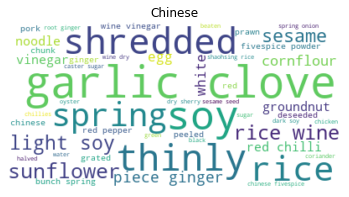

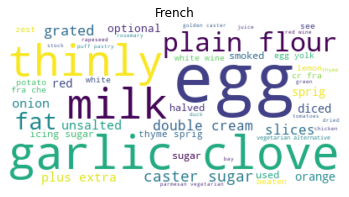

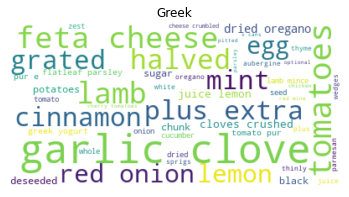

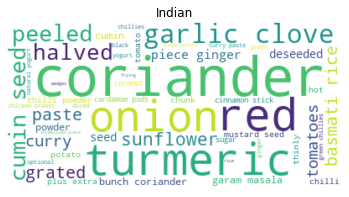

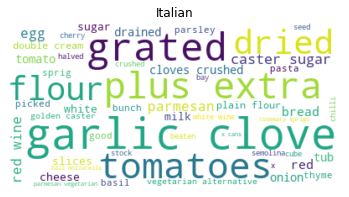

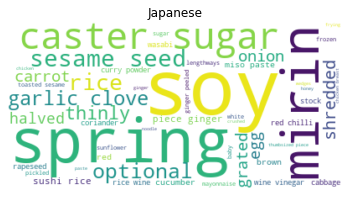

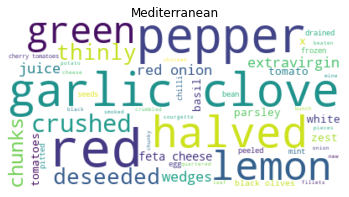

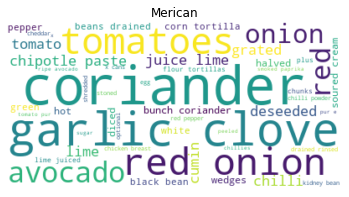

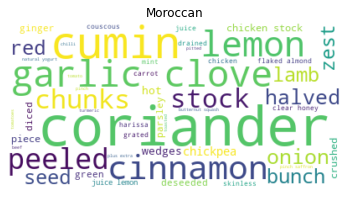

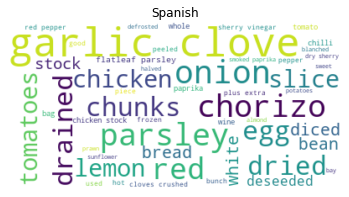

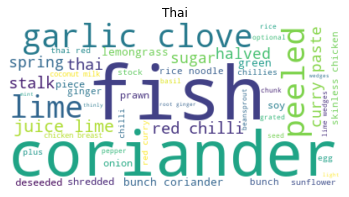

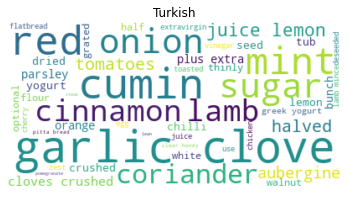

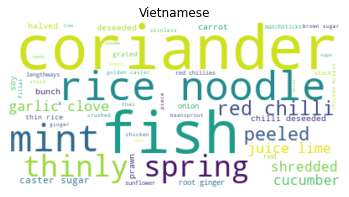

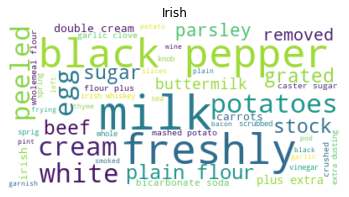

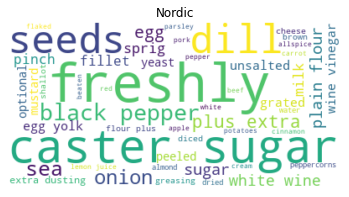

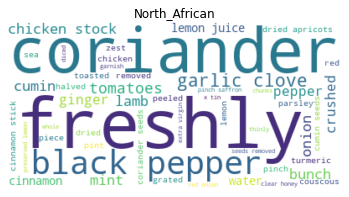

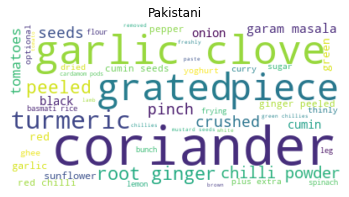

In [15]:
wordcloud(amer, 'America')
wordcloud(brit, 'British')
wordcloud(cari, 'Caribbean')
wordcloud(chin, 'Chinese')
wordcloud(fren, 'French')
wordcloud(gree, 'Greek')
wordcloud(indi, 'Indian')
wordcloud(ital, 'Italian')
wordcloud(japa, 'Japanese')
wordcloud(medi, 'Mediterranean')
wordcloud(mexi, 'Merican')
wordcloud(moro, 'Moroccan')
wordcloud(span, 'Spanish')
wordcloud(thai, 'Thai')
wordcloud(turk, 'Turkish')
wordcloud(viet, 'Vietnamese')
wordcloud(iris, 'Irish')
wordcloud(nord, 'Nordic')
wordcloud(nafr, 'North_African')
wordcloud(paki, 'Pakistani')

In [70]:
def clean_strings(string):
    #tokenize
    tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
    tokenized_string = tokenizer.tokenize(string)
    
    #lower
    lowered_string = [word.lower() for word in tokenized_string]
    
    #lemmatization
    lemmatizer = WordNetLemmatizer() 
    lemmatized_string = [lemmatizer.lemmatize(word) for word in lowered_string]
    
    #filter stop words
    stop_words=set(stopwords.words("english"))
    filtered_string = [word for word in lemmatized_string if word not in stop_words]
   
    #remove custom stop words
    custom_stop_words = [stopwds, 'inch', 'ounce', 'pound', 'pounds', 'teaspoon', 'tablespoon', 'cup', 'small', 'medium', 'large', 'oz', 'lb', 'lbs', 'g', 'kg', 'gram', 'grams', 'cm', 'chopped', 'tbsp', 'tsp', 'ml', 'l', 'tsp', 'fl']
    cleaned_string = [word for word in filtered_string if word not in custom_stop_words]
    
    return cleaned_string

In [72]:
df2 = df.apply(lambda row: clean_strings(row['Ingredients']), axis=1)

In [106]:
df3[0]

0      [chicken, thigh, drumstick, sea, salt, flake, ...
1      [chicken, beef, short, rib, rib, separated, pi...
2      [unsalted, butter, softened, golden, caster, s...
3      [whole, chicken, jointed, bonein, chicken, pie...
4      [macaroni, whole, milk, bay, leaf, butter, pla...
                             ...                        
895    [urid, dal, black, vegetable, oil, freshly, gr...
896    [strong, white, flour, salt, sachet, fastactio...
897    [rhubarb, light, soft, brown, sugar, vanilla, ...
898    [flour, selfraising, flour, red, chilli, powde...
899    [vegetable, oil, piece, ginger, grated, garlic...
Name: 0, Length: 900, dtype: object

In [107]:
df3['Ingredients'] = df3[0]

In [121]:
def vectorize(df):
    text = df['Ingredients'].values
    cv = CountVectorizer(stop_words=more_words)
    X = cv.fit_transform(text)

    cvdf = pd.DataFrame(X.toarray(), columns = cv.get_feature_names())
    return cvdf.head(), cvdf.columns

In [122]:
cvdf = vectorize(df)
cvdf

(   aberdeen  absorbing  according  action  adam  add  african  airdried  ale  \
 0         0          0          0       0     0    0        0         0    0   
 1         0          0          0       0     0    0        0         0    0   
 2         0          0          0       0     0    0        0         0    0   
 3         0          0          0       0     0    0        0         0    0   
 4         0          0          0       0     0    0        0         0    0   
 
    allbutter  ...  yoghurt  yogurt  yolk  yolks  young  youre  youve  yuzu  \
 0          0  ...        0       0     0      0      0      0      0     0   
 1          0  ...        0       0     0      0      0      0      0     0   
 2          0  ...        0       0     0      1      0      0      0     0   
 3          0  ...        0       0     0      0      0      0      0     0   
 4          0  ...        0       0     0      0      0      0      0     0   
 
    zest  zested  
 0     0       0 

In [132]:
def tf_idf(df):
    tfv = TfidfVectorizer(stop_words = more_words)
    text_tf = tfv.fit_transform(df['Ingredients'])
    return text_tf.data

In [133]:
tfdf = tf_idf(df)
tfdf

array([0.19842221, 0.21952415, 0.14187057, ..., 0.09339045, 0.11888825,
       0.08327379])

In [130]:
def count_vectorize(df):
    cv = CountVectorizer(stop_words = more_words)
    emb = cv.fit_transform(df)
    return emb, cv

In [131]:
vvdf = count_vectorize(df)
vvdf

(<2x2 sparse matrix of type '<class 'numpy.int64'>'
 	with 2 stored elements in Compressed Sparse Row format>,
 CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                 dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                 lowercase=True, max_df=1.0, max_features=None, min_df=1,
                 ngram_range=(1, 1), preprocessor=None,
                 stop_words=['chopped', 'sliced', 'sauce', 'finely', 'roughly',
                             'leave', 'serve', 'cut', 'olive', 'oil', 'leaves',
                             'salt', 'butter', 'pack', 'vegetable', 'onions',
                             'handful', 'cooked', 'ground', 'fresh',
                             'freerange'],
                 strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                 tokenizer=None, vocabulary=None))

# Models

In [137]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

## model 1

In [138]:
X = df.Ingredients
y = df.Cuisine
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [141]:
names = ['American', 'British', 'Caribbean','Chinese','French','Greek','Indian','Italian','Japanese','Mediterranean','Mexican',
         'Morocca','Spanish','Thai','Turkish','Vietnamese','Irish','Nordic','North_African','Pakistani']

In [148]:
# Naieve Bayes
naive = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
naive.fit(X_train, y_train)

y_pred = naive.predict(X_test)

# print('accuracy %s' % accuracy_score(y_pred, y_test))
(classification_report(y_test, y_pred,target_names=names))

accuracy 0.4488888888888889
               precision    recall  f1-score   support

     American       0.30      0.60      0.40        15
      British       0.00      0.00      0.00        14
    Caribbean       0.00      0.00      0.00         5
      Chinese       0.47      1.00      0.64         8
       French       0.54      0.54      0.54        13
        Greek       0.55      0.67      0.60         9
       Indian       0.74      0.74      0.74        19
      Italian       0.00      0.00      0.00        17
     Japanese       0.84      0.80      0.82        20
Mediterranean       0.00      0.00      0.00         6
      Mexican       0.57      0.95      0.71        22
      Morocca       1.00      0.12      0.22         8
      Spanish       0.00      0.00      0.00        10
         Thai       1.00      0.17      0.29         6
      Turkish       0.00      0.00      0.00         8
   Vietnamese       0.00      0.00      0.00         4
        Irish       0.00      0.00  

C:\Users\akams\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [144]:
# SVM
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=names))

accuracy 0.6177777777777778
               precision    recall  f1-score   support

     American       0.57      0.53      0.55        15
      British       0.75      0.43      0.55        14
    Caribbean       1.00      0.80      0.89         5
      Chinese       0.55      0.75      0.63         8
       French       0.35      0.54      0.42        13
        Greek       0.36      0.89      0.52         9
       Indian       0.79      0.58      0.67        19
      Italian       0.56      0.29      0.38        17
     Japanese       0.94      0.85      0.89        20
Mediterranean       0.00      0.00      0.00         6
      Mexican       0.86      0.86      0.86        22
      Morocca       1.00      0.50      0.67         8
      Spanish       0.33      0.40      0.36        10
         Thai       0.56      0.83      0.67         6
      Turkish       0.50      0.25      0.33         8
   Vietnamese       0.17      0.25      0.20         4
        Irish       0.64      0.70  

In [145]:
# Logistic Regression
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=names))

accuracy 0.6222222222222222
               precision    recall  f1-score   support

     American       0.50      0.53      0.52        15
      British       0.88      0.50      0.64        14
    Caribbean       1.00      0.60      0.75         5
      Chinese       0.56      0.62      0.59         8
       French       0.37      0.54      0.44        13
        Greek       0.41      0.78      0.54         9
       Indian       0.79      0.58      0.67        19
      Italian       0.40      0.24      0.30        17
     Japanese       0.94      0.85      0.89        20
Mediterranean       0.00      0.00      0.00         6
      Mexican       0.86      0.86      0.86        22
      Morocca       0.67      0.50      0.57         8
      Spanish       0.36      0.50      0.42        10
         Thai       0.50      0.67      0.57         6
      Turkish       0.60      0.38      0.46         8
   Vietnamese       0.14      0.25      0.18         4
        Irish       0.82      0.90  

C:\Users\akams\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\akams\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
